# 1.  
The IOB format categorizes tagged tokens as I, O and B. Why are three tags necessary? What problem would be caused if we used I and O tags exclusively?

IOB tags are necessary to help determine chunks and Enities. These tags are necesary to maintain ridged structure and determine when chunks/entities begin, run to, and end. Only using IOB tags, classifiers would need some extra steps to determine when a chunk or n-gram begins. 

# 2. 
\Write a tag pattern to match noun phrases containing plural head nouns, e.g. "many/JJ researchers/NNS", "two/CD weeks/NNS", "both/DT new/JJ positions/NNS". Try to do this by generalizing the tag pattern that handled singular noun phrases.



In [ ]:
pattern = r"<JJ>?<NN.*>+"

# 3.
Pick one of the three chunk types in the CoNLL corpus. Inspect the CoNLL corpus and try to observe any patterns in the POS tag sequences that make up this kind of chunk. Develop a simple chunker using the regular expression chunker nltk.RegexpParser. Discuss any tag sequences that are difficult to chunk reliably.

In [5]:
from nltk.corpus import conll2002
help(conll2002)

Help on ConllChunkCorpusReader in module nltk.corpus.reader.conll object:

class ConllChunkCorpusReader(ConllCorpusReader)
 |  ConllChunkCorpusReader(root, fileids, chunk_types, encoding='utf8', tagset=None, separator=None)
 |  
 |  A ConllCorpusReader whose data file contains three columns: words,
 |  pos, and chunk.
 |  
 |  Method resolution order:
 |      ConllChunkCorpusReader
 |      ConllCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, fileids, chunk_types, encoding='utf8', tagset=None, separator=None)
 |      :type root: PathPointer or str
 |      :param root: A path pointer identifying the root directory for
 |          this corpus.  If a string is specified, then it will be
 |          converted to a ``PathPointer`` automatically.
 |      :param fileids: A list of the files that make up this corpus.
 |          This list can either be specified explicitly, as a list of
 |          str

In [14]:
from nltk.corpus import conll2000
help(conll2000)

Help on ConllChunkCorpusReader in module nltk.corpus.reader.conll object:

class ConllChunkCorpusReader(ConllCorpusReader)
 |  ConllChunkCorpusReader(root, fileids, chunk_types, encoding='utf8', tagset=None, separator=None)
 |  
 |  A ConllCorpusReader whose data file contains three columns: words,
 |  pos, and chunk.
 |  
 |  Method resolution order:
 |      ConllChunkCorpusReader
 |      ConllCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, fileids, chunk_types, encoding='utf8', tagset=None, separator=None)
 |      :type root: PathPointer or str
 |      :param root: A path pointer identifying the root directory for
 |          this corpus.  If a string is specified, then it will be
 |          converted to a ``PathPointer`` automatically.
 |      :param fileids: A list of the files that make up this corpus.
 |          This list can either be specified explicitly, as a list of
 |          str

In [15]:
conll2000.fileids()

['train.txt', 'test.txt']

In [13]:
for i in range(3):
    print(i, conll2000.chunked_sents('train.txt', chunk_types = ['VP'])[i])

0 (S
  Confidence/NN
  in/IN
  the/DT
  pound/NN
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  another/DT
  sharp/JJ
  dive/NN
  if/IN
  trade/NN
  figures/NNS
  for/IN
  September/NNP
  ,/,
  due/JJ
  for/IN
  release/NN
  tomorrow/NN
  ,/,
  (VP fail/VB to/TO show/VB)
  a/DT
  substantial/JJ
  improvement/NN
  from/IN
  July/NNP
  and/CC
  August/NNP
  's/POS
  near-record/JJ
  deficits/NNS
  ./.)
1 (S
  Chancellor/NNP
  of/IN
  the/DT
  Exchequer/NNP
  Nigel/NNP
  Lawson/NNP
  's/POS
  restated/VBN
  commitment/NN
  to/TO
  a/DT
  firm/NN
  monetary/JJ
  policy/NN
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  a/DT
  freefall/NN
  in/IN
  sterling/NN
  over/IN
  the/DT
  past/JJ
  week/NN
  ./.)
2 (S
  But/CC
  analysts/NNS
  (VP reckon/VBP)
  underlying/VBG
  support/NN
  for/IN
  sterling/NN
  (VP has/VBZ been/VBN eroded/VBN)
  by/IN
  the/DT
  chancellor/NN
  's/POS
  failure/NN
  (VP to/TO announce/VB)
  any/DT
  new/JJ
  policy/NN
  measures/NNS
  in/IN
  his/PRP$
  Mansio

Taken from [here](https://github.com/Sturzgefahr/Natural-Language-Processing-with-Python-Analyzing-Text-with-the-Natural-Language-Toolkit/blob/master/Chapter%2007/NLTK%20Chapter%207%20-%20Notes%20and%20Exercises.ipynb).
The most common patterns observed were:

verbs alone:
(VP rose/VBD)

verbs preceded by auxiliary verbs:
(VP are/VBP topped/VBN) (VP has/VBZ been/VBN eroded/VBN)

verbs preceded by modals:
(VP could/MD be/VB)

It would be difficult to craft regex patterns to capture all possible patterns, let alone the most common ones.

Let's try with a naive approach, using tags that begin with the letters that are characteristic of VP tags:

In [17]:
import nltk 
grammar = r"VP: {<[VRMT].*>+}"
cp = nltk.RegexpParser(grammar)
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['VP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  94.3%%
    Precision:     64.2%%
    Recall:        80.4%%
    F-Measure:     71.4%%


# 4. 

An early definition of chunk was the material that occurs between chinks. Develop a chunker that starts by putting the whole sentence in a single chunk, and then does the rest of its work solely by chinking. Determine which tags (or tag sequences) are most likely to make up chinks with the help of your own utility program. Compare the performance and simplicity of this approach relative to a chunker based entirely on chunk rules.

In [39]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN|BE>+{      # Chink sequences of VBD and IN
  """
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
cp = nltk.RegexpParser(grammar)

In [40]:
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  58.1%%
    Precision:     26.0%%
    Recall:        17.2%%
    F-Measure:     20.7%%


In [41]:
#Regular Chunking 
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  67.7%%
    Precision:     48.1%%
    Recall:        37.4%%
    F-Measure:     42.1%%


Clearly the rules we set limit the accuracy of the chinking model but with much less work on the regex we achieved a difference of accuracy less than 10%. 

# 5. 

Write a tag pattern to cover noun phrases that contain gerunds, e.g. "the/DT receiving/VBG end/NN", "assistant/NN managing/VBG editor/NN". Add these patterns to the grammar, one per line. Test your work using some tagged sentences of your own devising.

In [54]:
sentences = [[("the", "DT"), ("receiving", "VBG"), ("end", "NN")], 
             [("assistant", "NN"),  ("managing", "VBG"),  ("editor", "NN")]]

grammar = r"""
  NP: {<N.*>+<V.*>*<N.*>+ } # Noun, verb, noun
      {<DT|PP\$>?<V.*>*<NN>}   # chunk determiner/possessive, Verbs and noun
      {<NNP>+}                # chunk sequences of proper nouns
      
"""
cp = nltk.RegexpParser(grammar)
for sent in sentences:
    print(cp.parse(sent))

(S (NP the/DT receiving/VBG end/NN))
(S (NP assistant/NN managing/VBG editor/NN))


In [55]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  63.2%%
    Precision:     48.7%%
    Recall:        32.7%%
    F-Measure:     39.1%%


When reading the book I made much worse regex patterns, this is pretty decent. 

# 6. 
Write one or more tag patterns to handle coordinated noun phrases, e.g. "July/NNP and/CC August/NNP", "all/DT your/PRP$ managers/NNS and/CC supervisors/NNS", "company/NN courts/NNS and/CC adjudicators/NNS".

In [62]:
grammar = r"""
    NP : {<DT>?<PRP\$>?<N.*>+ <.*>*<N.*>+} 
"""
cp = nltk.RegexpParser(grammar)
sentences = [[("July", "NNP"),  ("and", "CC"), ("August", "NNP")], 
             [("all", "DT"), ("your", "PRP$"), ("managers", "NNS"), 
              ("and", "CC"), ("supervisors", "NNS")], 
             [("company", "NN"), ("courts", "NNS"), 
              ("and", "CC"), ("adjudicators", "NNS")]]

for sent in sentences:
    print(cp.parse(sent))

(S (NP July/NNP and/CC August/NNP))
(S (NP all/DT your/PRP$ managers/NNS and/CC supervisors/NNS))
(S (NP company/NN courts/NNS and/CC adjudicators/NNS))


# 7. 
Carry out the following evaluation tasks for any of the chunkers you have developed earlier. (Note that most chunking corpora contain some internal inconsistencies, such that any reasonable rule-based approach will produce errors.)
- Evaluate your chunker on 100 sentences from a chunked corpus, and report the precision, recall and F-measure.
- Use the chunkscore.missed() and chunkscore.incorrect() methods to identify the errors made by your chunker. Discuss.
- Compare the performance of your chunker to the baseline chunker discussed in the evaluation section of this chapter.

In [66]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [72]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])[100:200]
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])[:100]
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  91.6%%
    Precision:     77.7%%
    Recall:        86.7%%
    F-Measure:     82.0%%


In [77]:
unigram_chunker.evaluate(test_sents).incorrect()

[ImmutableTree('NP', [('television', 'NN'), ('stations', 'NNS')]),
 ImmutableTree('NP', [('leftists', 'NNS')]),
 ImmutableTree('NP', [('internal', 'JJ'), ('controls', 'NNS')]),
 ImmutableTree('NP', [('external', 'JJ'), ('pressure', 'NN')]),
 ImmutableTree('NP', [('the', 'DT')]),
 ImmutableTree('NP', [('serious', 'JJ')]),
 ImmutableTree('NP', [('more', 'JJR')]),
 ImmutableTree('NP', [('open', 'JJ')]),
 ImmutableTree('NP', [('drunkenness', 'NN')]),
 ImmutableTree('NP', [('more', 'JJR')]),
 ImmutableTree('NP', [('crisper', 'NN')]),
 ImmutableTree('NP', [('important', 'JJ')]),
 ImmutableTree('NP', [('Dan', 'NNP'), ('Shaughnessy', 'NNP')]),
 ImmutableTree('NP', [('more', 'JJR')]),
 ImmutableTree('NP', [('the', 'DT'), ('capitalist-exploiters-greedy-American-consumers-global', 'JJ')]),
 ImmutableTree('NP', [('U.S.', 'NNP'), ('officials', 'NNS'), ('monitoring', 'NN'), ('crematoriums', 'NNS')]),
 ImmutableTree('NP', [('pages', 'NNS')]),
 ImmutableTree('NP', [('older', 'JJR')]),
 ImmutableTree('

In [78]:
unigram_chunker.evaluate(test_sents).missed()

[ImmutableTree('NP', [('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('drawings', 'NNS')]),
 ImmutableTree('NP', [('increasing', 'VBG'), ('external', 'JJ'), ('pressure', 'NN')]),
 ImmutableTree('NP', [('mammoths', 'NNS')]),
 ImmutableTree('NP', [('the', 'IN'), ('columnists', 'NNS')]),
 ImmutableTree('NP', [('radio', 'NN'), ('and', 'CC'), ('television', 'NN'), ('stations', 'NNS')]),
 ImmutableTree('NP', [('the', 'DT'), ('will', 'MD')]),
 ImmutableTree('NP', [('drunkenness', 'NN'), ('and', 'CC'), ('mistrust', 'NN')]),
 ImmutableTree('NP', [('that', 'IN')]),
 ImmutableTree('NP', [('more', 'JJR'), ('than', 'IN'), ('$', '$'), ('5', 'NN'), ('billion', 'CD')]),
 ImmutableTree('NP', [('a', 'DT'), ('hiring', 'VBG'), ('freeze', 'NN')]),
 ImmutableTree('NP', [('financial', 'JJ'), ('controls', 'NNS')]),
 ImmutableTree('NP', [('the', 'DT'), ('next', 'JJ'), ('three', 'CD'), ('or', 'CC'), ('four', 'CD'), ('or', 'CC'), ('five', 'CD'), ('or', 'CC'), ('six', 'CD'), ('years', 'NNS')]),
 ImmutableTree('

# 8.

Develop a chunker for one of the chunk types in the CoNLL corpus using a regular-expression based chunk grammar RegexpChunk. Use any combination of rules for chunking, chinking, merging or splitting.

In [82]:
grammar = r"""
    NP :{<N.*>+ <.*>*<N.*>+} #Nouns with string inbetween 
        {<DT>?<JJ.*><N.*>+} #Nouns in a determiner, JJ fotmat
        }<V.*>+{ #Chink on verbs
"""
cp = nltk.RegexpParser(grammar)
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  53.6%%
    Precision:     14.4%%
    Recall:         7.4%%
    F-Measure:      9.8%%


As we can see my chunk parse score is terrible 

# 9. 

Sometimes a word is incorrectly tagged, e.g. the head noun in "12/CD or/CC so/RB cases/VBZ". Instead of requiring manual correction of tagger output, good chunkers are able to work with the erroneous output of taggers. Look for other examples of correctly chunked noun phrases with incorrect tags.

In [ ]:
# We too to look at chunked data
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
#With the words we need to check for incorrect tags. A transformation tagging system wasn't introduced. 


# 10. 

The bigram chunker scores about 90% accuracy. Study its errors and try to work out why it doesn't get 100% accuracy. Experiment with trigram chunking. Are you able to improve the performance any more?

In [83]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): #: a constructor
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data) 

    def parse(self, sentence): # the parse method
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

bigram_chunker = BigramChunker(train_sents)
print(bigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  85.6%%
    Precision:     81.6%%
    Recall:        72.9%%
    F-Measure:     77.0%%


In [84]:
print(bigram_chunker.evaluate(test_sents).incorrect())

[ImmutableTree('NP', [('more', 'JJR')]), ImmutableTree('NP', [('futures', 'NNS')]), ImmutableTree('NP', [('lung-cancer', 'NN'), ('mortality', 'NN')]), ImmutableTree('NP', [('Assistant', 'NNP'), ('Secretary', 'NNP')]), ImmutableTree('NP', [('most', 'RBS'), ('liquid', 'JJ'), ('stocks', 'NNS')]), ImmutableTree('NP', [('The', 'DT'), ('National', 'NNP'), ('Aeronautics', 'NNP')]), ImmutableTree('NP', [('routine', 'JJ')]), ImmutableTree('NP', [('itself', 'PRP')]), ImmutableTree('NP', [('competitive', 'JJ'), ('pressure', 'NN')]), ImmutableTree('NP', [('$', '$'), ('365', 'CD')]), ImmutableTree('NP', [('1.85', 'CD'), ('marks', 'NNS')]), ImmutableTree('NP', [('him', 'PRP'), ('important', 'JJ'), ('protectors', 'NNS')]), ImmutableTree('NP', [('restaurants', 'NNS')]), ImmutableTree('NP', [('Cross', 'NNP')]), ImmutableTree('NP', [('June', 'NNP'), ('30', 'CD')]), ImmutableTree('NP', [('likely', 'JJ')]), ImmutableTree('NP', [('more', 'JJR')]), ImmutableTree('NP', [('yesterday', 'NN'), ('achieved', 'VBN

In [85]:
print(bigram_chunker.evaluate(test_sents).missed())

[ImmutableTree('NP', [('it', 'PRP')]), ImmutableTree('NP', [('the', 'DT'), ('appropriations', 'NNS'), ('conference', 'NN')]), ImmutableTree('NP', [('this', 'DT'), ('year', 'NN')]), ImmutableTree('NP', [('Harry', 'NNP'), ('Lee', 'NNP'), ('Smith', 'NNP')]), ImmutableTree('NP', [('this', 'DT'), ('summer', 'NN')]), ImmutableTree('NP', [('Calif', 'NNP')]), ImmutableTree('NP', [('parental', 'JJ'), ('leaves', 'NNS')]), ImmutableTree('NP', [('mountain', 'NN'), ('bicycles', 'NNS')]), ImmutableTree('NP', [('Coca-Cola', 'NNP'), ('Enterprises', 'NNPS')]), ImmutableTree('NP', [('an', 'DT'), ('advertisement', 'NN')]), ImmutableTree('NP', [('that', 'IN')]), ImmutableTree('NP', [('the', 'DT'), ('preference', 'NN')]), ImmutableTree('NP', [('overgeneralization', 'NN')]), ImmutableTree('NP', [('robust', 'JJ'), ('third-quarter', 'JJ'), ('earnings', 'NNS')]), ImmutableTree('NP', [('The', 'DT'), ('eucalyptus', 'NN'), ('plantation', 'NN'), ('and', 'CC'), ('pulp', 'NN'), ('mill', 'NN')]), ImmutableTree('NP', 

Some of the incorrect are tied to unigrams. Bigram taggers need the context to determine what it is. Like pos tags, we cannot tag something we have not encountered and we tag based of most frequent occurances. This leads us to miss 100%. 

# 10.
Apply the n-gram and Brill tagging methods to IOB chunk tagging. Instead of assigning POS tags to words, here we will assign IOB tags to the POS tags. E.g. if the tag DT (determiner) often occurs at the start of a chunk, it will be tagged B (begin). Evaluate the performance of these chunking methods relative to the regular expression chunking methods covered in this chapter.

In [87]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [88]:
postags = sorted(set(pos for sent in train_sents
                     for (word,pos) in sent.leaves()))
print(unigram_chunker.tagger.tag(postags))

[('#', 'B-NP'), ('$', 'B-NP'), ("''", 'O'), ('(', 'O'), (')', 'O'), (',', 'O'), ('.', 'O'), (':', 'O'), ('CC', 'O'), ('CD', 'I-NP'), ('DT', 'B-NP'), ('EX', 'B-NP'), ('FW', 'I-NP'), ('IN', 'O'), ('JJ', 'I-NP'), ('JJR', 'B-NP'), ('JJS', 'I-NP'), ('MD', 'O'), ('NN', 'I-NP'), ('NNP', 'I-NP'), ('NNPS', 'I-NP'), ('NNS', 'I-NP'), ('PDT', 'B-NP'), ('POS', 'B-NP'), ('PRP', 'B-NP'), ('PRP$', 'B-NP'), ('RB', 'O'), ('RBR', 'O'), ('RBS', 'B-NP'), ('RP', 'O'), ('SYM', 'O'), ('TO', 'O'), ('UH', 'O'), ('VB', 'O'), ('VBD', 'O'), ('VBG', 'O'), ('VBN', 'O'), ('VBP', 'O'), ('VBZ', 'O'), ('WDT', 'B-NP'), ('WP', 'B-NP'), ('WP$', 'B-NP'), ('WRB', 'O'), ('``', 'O')]


While I started progressing on this I became warry of how I could accomplish this. To say the least there is a SO on [this](https://stackoverflow.com/questions/37960667/training-iob-chunker-using-nltk-tag-brill-trainer-transformation-based-learning/40508641#40508641). Written by the nltk brill author. 

There is a lot a typical student will have to learn to do this problem. 

# 12 

We saw in that it is possible to establish an upper limit to tagging performance by looking for ambiguous n-grams, n-grams that are tagged in more than one possible way in the training data. Apply the same method to determine an upper bound on the performance of an n-gram chunker.

In [2]:
import nltk
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): #: a constructor
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data) 

    def parse(self, sentence): # the parse method
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

# bigram_chunker = BigramChunker(train_sents)
#print(bigram_chunker.evaluate(test_sents))

In [6]:
help(BigramChunker)

Help on class BigramChunker in module __main__:

class BigramChunker(nltk.chunk.api.ChunkParserI)
 |  BigramChunker(train_sents)
 |  
 |  A processing interface for identifying non-overlapping groups in
 |  unrestricted text.  Typically, chunk parsers are used to find base
 |  syntactic constituents, such as base noun phrases.  Unlike
 |  ``ParserI``, ``ChunkParserI`` guarantees that the ``parse()`` method
 |  will always generate a parse.
 |  
 |  Method resolution order:
 |      BigramChunker
 |      nltk.chunk.api.ChunkParserI
 |      nltk.parse.api.ParserI
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, train_sents)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  parse(self, sentence)
 |      Return the best chunk structure for the given tokens
 |      and return a tree.
 |      
 |      :param tokens: The list of (word, tag) tokens to be chunked.
 |      :type tokens: list(tuple)
 |      :rtype: Tree
 |  
 |  ---------

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
from nltk.corpus import conll2000

train_size = [.1,.3,.5,.7,.9]
results = []
n = len(conll2000.chunked_sents('train.txt', chunk_types = ['NP']))
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])

for size in train_size:
    train_sents = conll2000.chunked_sents('train.txt', chunk_types = ['NP'])[:int(n*size)]
    bigram_chunker = BigramChunker(train_sents)
    results.append(bigram_chunker.evaluate(test_sents).accuracy())
    #help(bigram_chunker.evaluate(test_sents))

Text(0, 0.5, 'Accuracy')

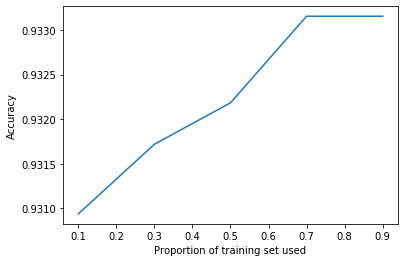

In [16]:
plt.plot(train_size, results)
plt.xlabel("Proportion of training set used")
plt.ylabel("Accuracy")

As the number of training instances increases, its accuracy grows. It grows unit it hits 70\%, after that the accuracy does not increase. More so the accuracy we did gain was minimal when going from a small proportion of training data to larger sample. This is only for Noun Phrase sentences 

In [17]:
class TrigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): #: a constructor
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.TrigramTagger(train_data) 

    def parse(self, sentence): # the parse method
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [18]:
train_size = [.1,.3,.5,.7,.9]
results = []
n = len(conll2000.chunked_sents('train.txt', chunk_types = ['NP']))
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])

for size in train_size:
    train_sents = conll2000.chunked_sents('train.txt', chunk_types = ['NP'])[:int(n*size)]
    trigram_chunker = TrigramChunker(train_sents)
    results.append(trigram_chunker.evaluate(test_sents).accuracy())

Text(0, 0.5, 'Accuracy')

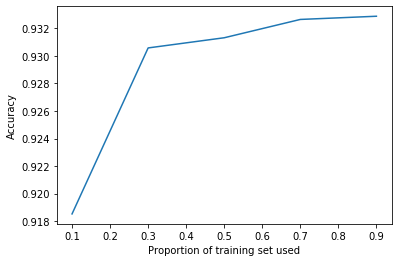

In [19]:
plt.plot(train_size, results)
plt.xlabel("Proportion of training set used")
plt.ylabel("Accuracy")

Again the gain in accuracy for NP chunks small. The trigram chunker started at a lower accuracy for 10/% of the data set used and almost levels out around 93\%. Much like POStaggers, I'm under the assumption that Trigram taggers have less accuracy and experince less gain as the n-gram increases.  

# 13

Pick one of the three chunk types in the CoNLL corpus. Write functions to do the following tasks for your chosen type:
- List all the tag sequences that occur with each instance of this chunk type.
- Count the frequency of each tag sequence, and produce a ranked list in order of decreasing frequency; each line should consist of an integer (the frequency) and the tag sequence.
- Inspect the high-frequency tag sequences. Use these as the basis for developing a better chunker.


These questions have been getting more difficult as the chapters have progressed. The [solutions](https://github.com/Sturzgefahr/Natural-Language-Processing-with-Python-Analyzing-Text-with-the-Natural-Language-Toolkit/blob/master/Chapter%2007/NLTK%20Chapter%207%20-%20Notes%20and%20Exercises.ipynb) thinks so as well.

Rather than frustrate and rob myself of knowledge containing in the next few chapter, I will skip the remaining questions. 

In [48]:
from nltk.chunk import tree2conlltags
np_tags = []

for (i, sent) in enumerate(conll2000.chunked_sents('train.txt')):
    for subtree in sent:
        # only want subtrees, so use `try-except` to eliminate
        # single nodes
        try:
            subtree.label()
        except AttributeError:
            pass
        else:
            if subtree.label() == 'NP':
                # concatenating a string with all the POS tags
                subtree_tag = ""
                for t in tree2conlltags(subtree):
                    if subtree_tag == "":
                        subtree_tag += t[1]
                    else:
                        subtree_tag += "/" + t[1]
                np_tags.append(subtree_tag)

In [49]:
len(set(np_tags))

2283